Imports



In [1]:
pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 1.7 MB/s eta 0:00:00


In [2]:
import requests    # Importing the 'requests' library for making HTTP requests
import json   # Importing 'json' for JSON data handling
import re   # Importing 're' for regular expressions
from bs4 import BeautifulSoup  # Importing 'BeautifulSoup' from 'bs4' for web scraping
import random  # Importing 'random' for generating random values
import json
import time  # Importing 'time' for handling time-related operations
import pandas as pd   # Importing 'pandas' for data manipulation and analysis
import ast  # Importing 'ast' for Abstract Syntax Trees (AST) manipulation
import time
import zlib  # Importing 'zlib' for data compression using zlib
import matplotlib.pyplot as plt  # Importing 'matplotlib.pyplot' for data visualization
from docx import Document
from io import BytesIO  # Importing 'BytesIO' for handling in-memory binary data
from docx.shared import Inches  # Importing 'Inches' from 'docx.shared' for specifying image dimensions
import os  # Importing 'os' for interacting with the operating system
from google.colab import files  # Importing 'files' from 'google.colab' for handling files in Google Colab
from concurrent.futures import ThreadPoolExecutor, as_completed  # Importing 'ThreadPoolExecutor' and 'as_completed' from 'concurrent.futures'
# for concurrent execution of tasks

In [3]:
os.listdir()

['.config', 'sample_data']

Crypto

                   Name         Value
0           Bitcoin USD  41062.550000
1          Ethereum USD   2170.700000
2       Tether USDt USD      0.999744
3               BNB USD    255.090000
4               XRP USD      0.614083
5            Solana USD     67.180000
6          USD Coin USD      1.000300
7   Lido Staked ETH USD   2171.440000
8           Cardano USD      0.561972
9         Avalanche USD     36.600000
10         Dogecoin USD      0.092039
11     Wrapped TRON USD      0.103386
12             TRON USD      0.103207
13         Polkadot USD      6.944300
14          Polygon USD      0.863351
15        Chainlink USD     14.240000
16          Toncoin USD      2.099300
17  Wrapped Bitcoin USD  41068.820000
18        Shiba Inu USD      0.000009
19              Dai USD      0.999517
20         Litecoin USD     71.550000
21      Wrapped EOS USD      4.285900
22     Bitcoin Cash USD    229.050000
23           Cosmos USD     11.450000
24          Uniswap USD      6.128300

Average Val

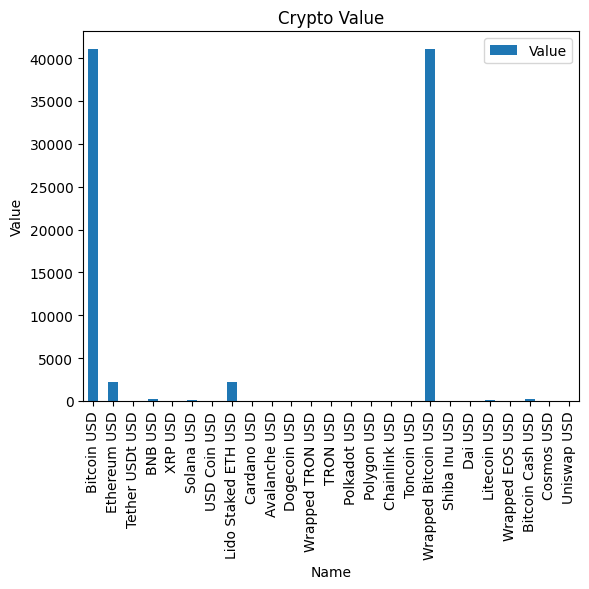

In [4]:
# Setting up the headers for the HTTP request
headers={
	'authority':'finance.yahoo.com', #Host
	'method': 'GET', #Request Method
	'path': '/?guccounter=1', #Request Path
	'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',#Accept Headers
	'Accept-Encoding': 'gzip, deflate, br', #Accept-Encoding Headers
	'Accept-Language':'en-US,en;q=0.9', #Accept-Language Headers
	'Cookie':'GUCS=ARSO3RtG; GUC=AQEBCAFldztlo0IffgRN&s=AQAAAEbpjiVK&g=ZXX06Q; A1=d=AQABBAcKVGUCEGhfQj3Sa039Tp4G24hQvisFEgEBCAE7d2WjZdwt0iMA_eMBAAcIBwpUZYhQvis&S=AQAAArFDvc_v5MS1GcUMVS0d_xI; A3=d=AQABBAcKVGUCEGhfQj3Sa039Tp4G24hQvisFEgEBCAE7d2WjZdwt0iMA_eMBAAcIBwpUZYhQvis&S=AQAAArFDvc_v5MS1GcUMVS0d_xI; A1S=d=AQABBAcKVGUCEGhfQj3Sa039Tp4G24hQvisFEgEBCAE7d2WjZdwt0iMA_eMBAAcIBwpUZYhQvis&S=AQAAArFDvc_v5MS1GcUMVS0d_xI; cmp=t=1702229218&j=0&u=1YNN; gpp=DBABVg~BVoAAAIA.QA; gpp_sid=12; maex=%7B%22v2%22%3A%7B%7D%7D',
}

# URL to fetch data from
url='https://finance.yahoo.com/crypto'
page=requests.get(url,headers=headers) # Making an HTTP GET request to fetch the webpage content
#print(page.text)

# Using BeautifulSoup to parse the HTML content of the webpage
soup = BeautifulSoup(page.text, 'html.parser')

# Extracting data from the parsed HTML
name_td = soup.find_all('td', {'class': 'Va(m) Ta(start) Px(10px) Fz(s)', 'aria-label': 'Name'})
price_td = soup.find_all('td', {'class': 'Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)', 'aria-label': 'Price (Intraday)'})
name=[td.get_text() for td in name_td]
price=[td.get_text() for td in price_td]

# Cleaning and converting price data to numerical format
index=0
while (index<len(price_td)):
    price[index]=price[index].replace(',','')
    price[index]=float(price[index])
    index=index+1


# Creating a DataFrame to organize the extracted data
crypto_df=pd.DataFrame({'Name':name,'Value':price})
print(crypto_df)
print()

#Calculating and printing statistical information about the crypto values
print('Average Value = '+str(crypto_df['Value'].mean()))
print('Maximum Value = '+str(crypto_df['Value'].max()))
print('Minimum Value = '+str(crypto_df['Value'].min()))
print('Median Value = '+str(crypto_df['Value'].median()))
print()

# Plotting a bar chart for the crypto values
crypto_df.plot(x='Name', y='Value', kind='bar')
plt.title('Crypto Value')
plt.xlabel('Name')
plt.ylabel('Value')
plt.show()

# image_stream = BytesIO()
# plt.savefig(image_stream, format='png')
# plt.close()

# # Create a Word document
# doc = Document()

# # Add text to the document
# doc.add_heading('Crypto', level=1)
# doc.add

# # Add the chart to the document
# doc.add_picture(image_stream, width=Inches(5.0))  # Adjust the width as needed

# # Save the Word document
# doc.save('document_with_chart.docx')

# print('Document saved successfully.')

Weather

Weather Forcast from December 12 - January 25

     date  day  high  low
1   12/12  Tue    44   37
2   12/13  Wed    44   31
3   12/14  Thu    39   34
4   12/15  Fri    52   42
5   12/16  Sat    53   40
6   12/17  Sun    52   46
7   12/18  Mon    52   39
8   12/19  Tue    41   35
9   12/20  Wed    43   34
10  12/21  Thu    45   33
11  12/22  Fri    45   39
12  12/23  Sat    49   37
13  12/24  Sun    47   40
14  12/25  Mon    48   42
15  12/26  Tue    50   31
16  12/27  Wed    46   32
17  12/28  Thu    42   31
18  12/29  Fri    38   33
19  12/30  Sat    40   37
20  12/31  Sun    47   39
21    1/1  Mon    49   35
22    1/2  Tue    41   30
23    1/3  Wed    34   29
24    1/4  Thu    33   31
25    1/5  Fri    41   31
26    1/6  Sat    40   30
27    1/7  Sun    44   34
28    1/8  Mon    45   36
29    1/9  Tue    45   32
30   1/10  Wed    40   27
31   1/11  Thu    38   34
32   1/12  Fri    43   37
33   1/13  Sat    48   28
34   1/14  Sun    40   25
35   1/15  Mon    35   29
36   1/16  Tue   

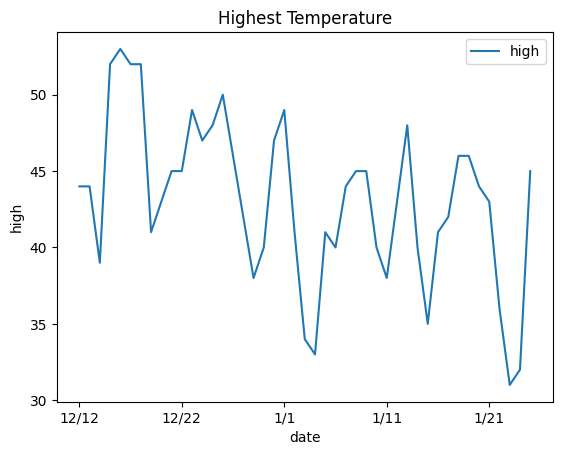

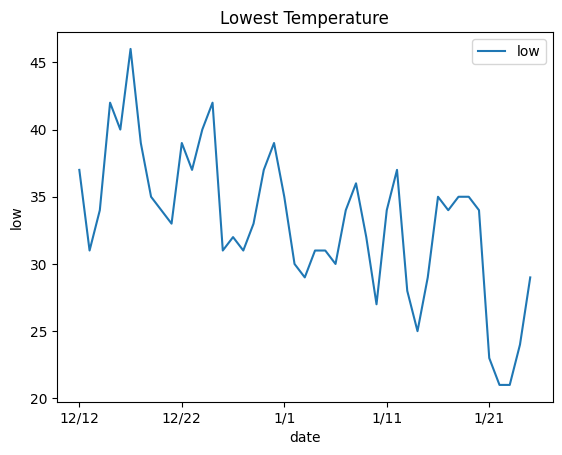

In [6]:
headers1 = {
    'authority': 'www.accuweather.com',
    'method': 'GET',
    'path': '/en/us/new-york/10021/daily-weather-forecast/349727',
    'scheme': 'https',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'awx_id=c3762d41-3c94-4d6b-9186-2144e9343067; awx_user=tp:F|lang:en-us|rl:[349727]|cDate:2023-12-10; us_privacy=1YNN; userid3p=active; awx_session_essential=pageView%3A1%7Cpartner%3Agoogle_search_accuweather; AKA_A2=A; ak_bmsc=376B9BA14D3AF19E68EB4D0C636A24FA~000000000000000000000000000000~YAAQxpw6F5M+nOCLAQAAqgISYBbv16PCBPmIvBlVFXZGrgAqE0tsnFAUOTS2psDa6SFDz+69498V4rjlaQ7SRNANfns4BSYAhw5CFWRJ+fl6d18EoQqm399u2LV6cIOgWBi6Eoy7SwGZsGHQE0zY6yrfNjhYEEH3KSU6UaxkCoZkzbf1swvSYay5rkHqptMv1BkAvF9oa4zlKVvtyGCNS9mW1gGSMSTO6DLElolwf9hO6iyqab/6isdu8DcD37SQu2HIzsYxXPI4iXyExAEwgE7c6/G0GBQmA+QiXlpKfz1WL/PkPnYc7GjKtQsNbD/W+739uxmXknhvrfotNvQ4w0RhM/izy43BTGE5yvSvGs2VsN6VfcKv49EYM+emRKjJWOaEPsJzn7uiBr/Pgw==; .AspNet.Consent=yes; user-timing={%22t%22:12}',
    'referer': 'https://www.accuweather.com/',
    'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
}

url1='https://www.accuweather.com/en/us/new-york/10021/daily-weather-forecast/349727'
page1=requests.get(url1,headers=headers1)
#print(page1.text)
soup1 = BeautifulSoup(page1.text, 'html.parser')
temp_high=soup1.find_all('span',class_='high')
temp_low=soup1.find_all('span',class_='low')
duration=soup1.find('p',class_='module-title')
dates=soup1.find_all('span',class_='module-header sub date')
dates=[span.get_text() for span in dates]
days=soup1.find_all('span',class_='module-header dow date')
days=[span.get_text() for span in days]
index=0
list_high=[]
list_low=[]
print('Weather Forcast from '+duration.text)
while(index<len(temp_high) and index<len(temp_low)):
    t_high=temp_high[index]
    t_low=temp_low[index]
    curr_high=t_high.text
    curr_low=t_low.text
    curr_high=curr_high[:-1]
    curr_low=curr_low[1:-1]
    list_high.append(int(curr_high))
    list_low.append(int(curr_low))
    #print('High/Low : '+t_high.text+t_low.text)
    index=index+1
print()

temp_df = pd.DataFrame({'date':dates,'day':days,'high': list_high, 'low': list_low})
temp_df.index=temp_df.index+1
print(temp_df)
print()

# Calculate average high
avg_high = temp_df['high'].mean()

# Calculate average low
avg_low = temp_df['low'].mean()

# Calculate average difference between high and low
avg_diff = temp_df['high'].sub(temp_df['low']).mean()

# Print the results
print(f'Average High: {avg_high}')
print(f'Average Low: {avg_low}')
print(f'Average Difference: {avg_diff}')
print()
temp_df.plot(x='date', y='high', kind='line')
plt.title('Highest Temperature')
plt.xlabel('date')
plt.ylabel('high')
plt.show()
print()
temp_df.plot(x='date', y='low', kind='line')
plt.title('Lowest Temperature')
plt.xlabel('date')
plt.ylabel('low')
plt.show()

Stocks

                       name   price    high     low  change     direction
1            Salesforce.com  256.55  256.55  251.02    5.53  Very Bullish
2          American Express  171.03  171.08  167.77    3.31  Very Bullish
3                      Visa  259.57  259.72  256.40    3.32  Very Bullish
4            JPMorgan Chase  160.50  160.65  158.88    1.77  Very Bullish
5                      Nike  119.64  119.94  118.58    1.36  Very Bullish
6                 Microsoft  374.33  374.36  370.46    3.90       Bullish
7                 McDonalds  291.40  291.70  288.51    3.19  Very Bullish
8                     Apple  194.66  194.66  191.72    2.94  Very Bullish
9                       IBM  164.69  166.34  162.92    3.42  Very Bullish
10      Travelers Companies  183.63  184.59  181.79    2.80  Very Bullish
11                    Amgen  273.87  277.25  273.26    3.99  Very Bullish
12                Coca-Cola   59.41   59.42   58.90    0.52  Very Bullish
13               Home Depot  333.22  3

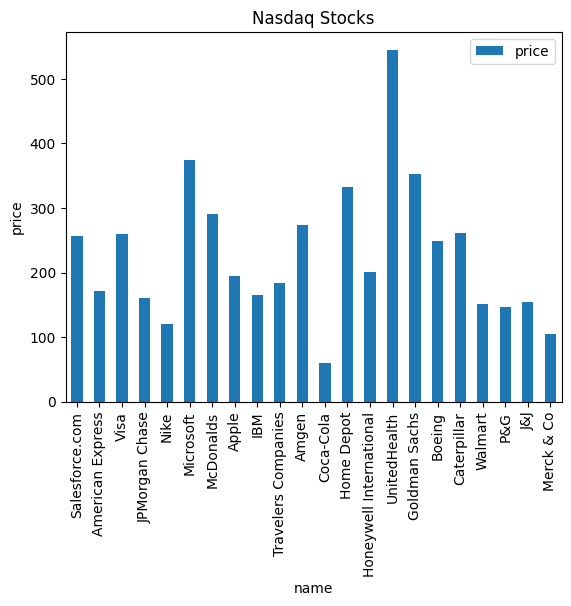

In [7]:
headers2 = {
    'authority': 'www.moneycontrol.com',
    'method': 'GET',
    'path': '/us-markets/market-movers/top-gainers?index=Dow%20jones',
    'scheme': 'https',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Cookie': 'PHPSESSID=fbtiingsc5pr5k3n0e7ik70b40',
    'Referer': 'https://www.moneycontrol.com/stocksmarketsindia/',
    'Sec-Ch-Ua': '"Google Chrome";v="117", "Not;A=Brand";v="8", "Chromium";v="117"',
    'Sec-Ch-Ua-Mobile': '?0',
    'Sec-Ch-Ua-Platform': '"macOS"',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'
}

url2='https://www.moneycontrol.com/us-markets/market-movers/top-gainers?index=Dow%20jones'
page2=requests.get(url2,headers=headers2)
soup2 = BeautifulSoup(page2.text, 'html.parser')
json_str=soup2.find('script',{'id': '__NEXT_DATA__', 'type':'application/json'})
json_str=str(json_str.text)
json_doc=json.loads(json_str)
#print(len(json_doc['props']['pageProps']['USData']['tableData']['body']['dataList']))

# Initializing index and empty lists to store stock data
index=0
list_name=[]
list_price=[]
list_high_price=[]
list_low_price=[]
list_change=[]
list_direction=[]

# Extracting stock data from the JSON document and populating lists
while(index<len(json_doc['props']['pageProps']['USData']['tableData']['body']['dataList'])):
	name=json_doc['props']['pageProps']['USData']['tableData']['body']['dataList'][index][1]
	price=json_doc['props']['pageProps']['USData']['tableData']['body']['dataList'][index][2]
	high_price=json_doc['props']['pageProps']['USData']['tableData']['body']['dataList'][index][5]
	low_price=json_doc['props']['pageProps']['USData']['tableData']['body']['dataList'][index][6]

  # Appending data to the respective lists
	list_name.append(name)
	list_price.append(float(price))
	list_high_price.append(float(high_price))
	list_low_price.append(float(low_price))
	list_change.append(float(high_price)-float(low_price))
	list_direction.append(json_doc['props']['pageProps']['USData']['tableData']['body']['dataList'][index][16])
	index=index+1

stocks_df=pd.DataFrame({'name':list_name,'price':list_price,'high':list_high_price,'low':list_low_price,'change':list_change,'direction':list_direction})
stocks_df.index=stocks_df.index+1
print(stocks_df)
print()
print()
print('Average Price of Stocks = '+str(stocks_df['price'].mean()))
print('Average High of Stocks = '+str(stocks_df['high'].mean()))
print('Average Low of Stocks = '+str(stocks_df['low'].mean()))
print('Average Change in price of Stocks = '+str(stocks_df['change'].mean()))
print('Maximum Price of Stocks = '+str(stocks_df['price'].max()))
print('Maximum High of Stocks = '+str(stocks_df['high'].max()))
print('Maximum Low of Stocks = '+str(stocks_df['low'].max()))
print('Maximum Change in price of Stocks = '+str(stocks_df['change'].max()))
print('Minimum Price of Stocks = '+str(stocks_df['price'].min()))
print('Minimum High of Stocks = '+str(stocks_df['high'].min()))
print('Minimum Low of Stocks = '+str(stocks_df['low'].min()))
print('Minimum Change in price of Stocks = '+str(stocks_df['change'].min()))

# Printing the count of each direction in the 'direction' column
print(stocks_df['direction'].value_counts().to_string())
print()

# Printing statistical information about the stock data
stocks_df.plot(x='name', y='price', kind='bar')
plt.title('Nasdaq Stocks')
plt.xlabel('name')
plt.ylabel('price')
plt.show()

Premier League Table

                       Club  GP   W  D   L   F   A   GD   P
1                 Liverpool  16  11  4   1  36  15  +21  37
2                   Arsenal  16  11  3   2  33  15  +18  36
3               Aston Villa  16  11  2   3  35  20  +15  35
4           Manchester City  16  10  3   3  38  18  +20  33
5         Tottenham Hotspur  16   9  3   4  33  23  +10  30
6         Manchester United  16   9  0   7  18  21   -3  27
7          Newcastle United  16   8  2   6  33  21  +12  26
8    Brighton & Hove Albion  16   7  5   4  33  28   +5  26
9           West Ham United  16   7  3   6  26  30   -4  24
10                   Fulham  16   6  3   7  26  26    0  21
11                Brentford  16   5  4   7  23  22   +1  19
12                  Chelsea  16   5  4   7  26  26    0  19
13  Wolverhampton Wanderers  16   5  4   7  21  26   -5  19
14          AFC Bournemouth  16   5  4   7  21  30   -9  19
15           Crystal Palace  16   4  4   8  15  23   -8  16
16        Nottingham Forest  16   3  5  

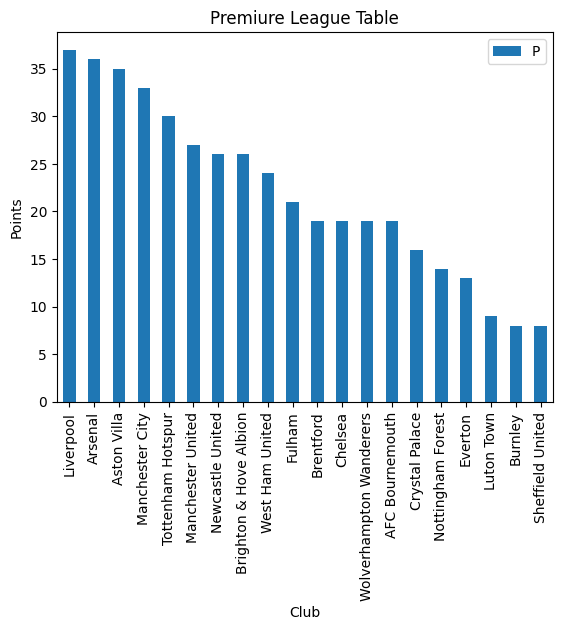

In [8]:
headers3 = {
    'authority': 'www.espn.com',
    'method': 'GET',
    'path': '/soccer/standings/_/league/eng.1',
    'scheme': 'https',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Cookie': 'country=us; edition-view=espn-en-us; connectionspeed=full; edition=espn-en-us; region=ccpa; _dcf=1; SWID=17F72B2E-B47B-426D-C281-0C3EFCC7D080; _nr=0; s_ensCDS=0; s_ensNSL=0; s_ensRegion=ccpa; s_ensNR=1702230883851-New; check=true; mbox=session#be746e177f774496a56100d02edcacd5#1702232745; userZip=06460; country=us; hashedIp=fc6f73bfe7807086b1e83f5089f1f209d5ba6433cfdb1998231a6d2ab84d8dbb; usprivacy=1YNY; AMCVS_EE0201AC512D2BE80A490D4C%40AdobeOrg=1; AMCV_EE0201AC512D2BE80A490D4C%40AdobeOrg=-330454231%7CMCIDTS%7C19702%7CMCMID%7C22608451439907772289214485753843301620%7CMCAID%7CNONE%7CMCOPTOUT-1702238087s%7CNONE%7CvVersion%7C3.1.2; s_c24=1702230887468; s_c24_s=First%20Visit; s_gpv_pn=espn%3Asoccer%3Astandings; s_c6=1702230887469-New; s_cc=true; OptanonConsent=isGpcEnabled=0&datestamp=Sun+Dec+10+2023+12%3A55%3A03+GMT-0500+(Eastern+Standard+Time)&version=202309.1.0&browserGpcFlag=0&isIABGlobal=false&hosts=&consentId=b080a296-4418-402f-8856-611bed13a89a&interactionCount=1&landingPath=https%3A%2F%2Fwww.espn.com%2Fsoccer%2Fstandings%2F_%2Fleague%2Feng.1&groups=C0001%3A1%2CC0003%3A1%2CBG1145%3A1%2CC0002%3A1%2CC0004%3A1%2CC0005%3A1',
    'If-Modified-Since': 'Sat, 09 Dec 2023 16:12:05 GMT',
    'Referer': 'https://www.google.com/',
    'Sec-Ch-Ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
    'Sec-Ch-Ua-Mobile': '?0',
    'Sec-Ch-Ua-Platform': '"macOS"',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
}

url3='https://www.espn.com/soccer/standings/_/league/eng.1'

# Making an HTTP GET request to fetch the webpage content
page3=requests.get(url3,headers=headers3)

# Using BeautifulSoup to parse the HTML content of the webpage
soup3 = BeautifulSoup(page3.text, 'html.parser')

# Extracting data for football clubs from the parsed HTML
clubs=soup3.find('tbody',class_='Table__TBODY')
points_list=soup3.find_all('span',class_='stat-cell')
points = [span.get_text() for span in points_list]

# Extracting team names from the text content of the clubs section
list_teams=[]
index=0
temp_club_name=''
my_set={'1','2','3','4','5','6','7','8','9','0'}
while (index<len(clubs.text)):
    curr_char=clubs.text[index]
    if clubs.text[index] in my_set:
        if len(temp_club_name)>0:
            list_teams.append(temp_club_name)
        temp_club_name=''
        index=index+1
        continue
    temp_club_name+=clubs.text[index]
    index=index+1
list_teams.append(temp_club_name)


# Removing extra characters from team names
index=0
while (index<len(list_teams)):
    list_teams[index]=list_teams[index][3:]
    index=index+1


# Initializing lists to store football clubs' data
list_clubs=[]
list_gp=[]
list_w=[]
list_d=[]
list_l=[]
list_f=[]
list_a=[]
list_gd=[]
list_p=[]


# Populating lists with football clubs' data
index=0
club_index=0
while(club_index<len(list_teams) and index<len(points)):
    list_clubs.append(list_teams[club_index])
    list_gp.append(points[index])
    list_w.append(int(points[index+1]))
    list_d.append(int(points[index+2]))
    list_l.append(int(points[index+3]))
    list_f.append(points[index+4])
    list_a.append(points[index+5])
    list_gd.append(points[index+6])
    list_p.append(int(points[index+7]))
    index=index+8
    club_index=club_index+1


#Creating a DataFrame to organize the football clubs' data
table_df=pd.DataFrame({'Club':list_clubs,'GP':list_gp,'W':list_w,'D':list_d,'L':list_l,'F':list_f,'A':list_a,'GD':list_gd,'P':list_p})
table_df.index=table_df.index+1
print(table_df)
print()

# Printing statistical information about the football clubs' data
print('Averave Win = '+str(table_df['W'].mean()))
print('Averave Loss = '+str(table_df['L'].mean()))
print('Averave Draw = '+str(table_df['D'].mean()))
print('Averave Points = '+str(table_df['P'].mean()))
print('Maximum Win = '+str(table_df['W'].max()))
print('Maximum Loss = '+str(table_df['L'].max()))
print('Maximum Points = '+str(table_df['P'].max()))
print('Minimum Points = '+str(table_df['P'].min()))
print()

table_df.plot(x='Club', y='P', kind='bar')
plt.title('Premiure League Table')
plt.xlabel('Club')
plt.ylabel('Points')
plt.show()

Olymocs 2020

                       Country  Gold  Silver  Bronze
1     United States of America    39      41      33
2   People's Republic of China    38      32      19
3                        Japan    27      14      17
4               United Kingdom    22      20      22
5                          ROC    20      28      23
..                         ...   ...     ...     ...
89                     Grenada     0       0       1
90               Côte d'Ivoire     0       0       1
91                      Kuwait     0       0       1
92        Syrian Arab Republic     0       0       1
93                       Ghana     0       0       1

[93 rows x 4 columns]

Average Gold = 3.6559139784946235
Average Silver = 3.6344086021505375
Average Bronze = 4.32258064516129
Maximum Gold = 39
Maximum Silver = 41
Maximum Bronze = 33
Least Gold = 0
Least Silver = 0
Least Bronze = 0



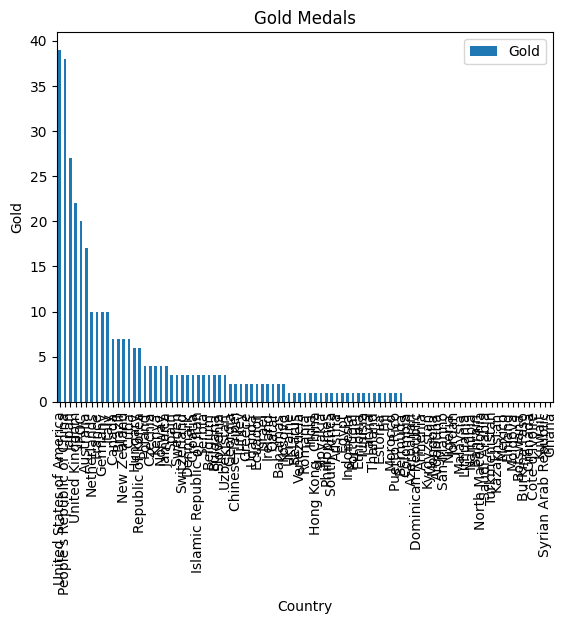

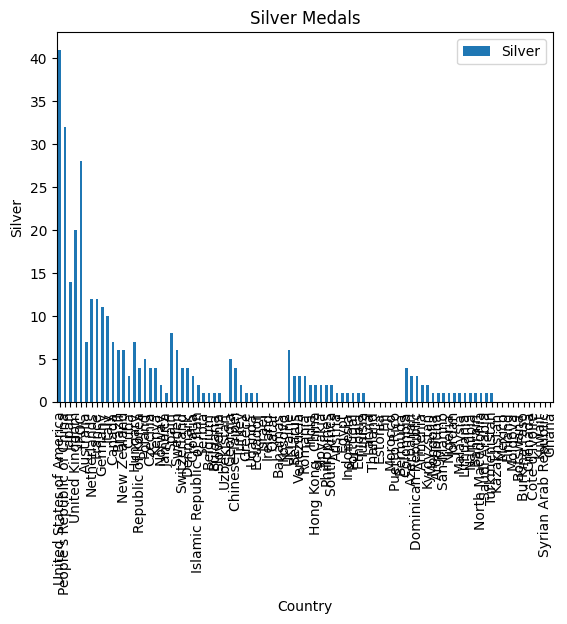

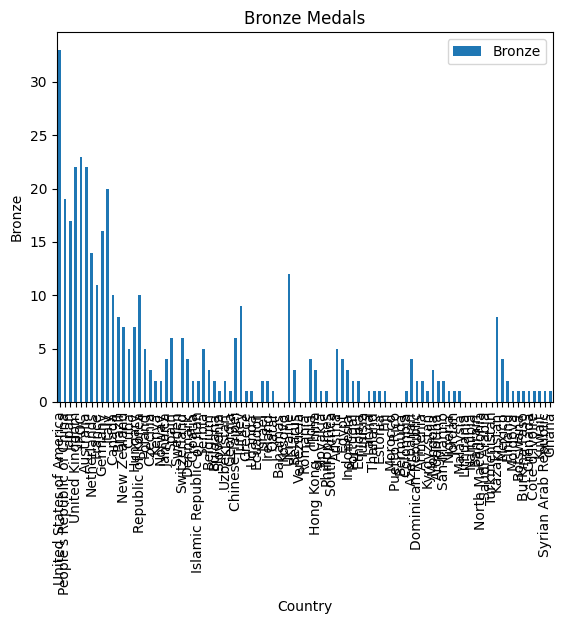

In [10]:
headers4 = {
    'authority': 'olympics.com',
    'method': 'GET',
    'path': '/en/olympic-games/tokyo-2020/medals',
    'scheme': 'https',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'OptanonAlertBoxClosed=2023-12-10T17:56:41.552Z; gig_canary=false; gig_bootstrap_3_0-C5fmAFNYLmRECBReEdIiy3GrU6r29UMMqR5ej2AF3EiMrp2XiSJ-W3qWQ76Bsf=olympicid_ver4; ak_bmsc=7B6BA4DBECDF2B2B656C2FD2E9BBD928~000000000000000000000000000000~YAAQRCTDF9rxLFuMAQAADRgUYBbm93uUWYgp7eHxEIPmJBNXh9CoRDLifUMpFteyXaizxMhHvjrd+h7bbOe4lhD0peVXQj4ZsTKsdgYZQC6BNfLlvo7qTOKYK17XzTvjocmL9hS6YpMIQDGCeFqoau6mA/qs610sCY7+dBrBuGhmB3nYLSf4nuhxQpi/n2gUKMqR4B/ajmAvcZuuA7KLhDJwoEXGuxEZ4wu+2D21+ePyyUVlTvmnI3oO/qPKYKaCDdsgL+PvHP69I8uMcKBmzXyG0R/y7v2EdFSYW7iJgwiKC+0KV2Dcva2w9fkFeuhbJodl15xrC0GAObiyi/rR6IJ8H1oEIZIC1zK8ChutH2z5QP8DE/PrSpH0GSuN6ZRRYElpkQWYGD17bw==; gig_canary_ver=15622-3-28373640; bm_mi=1F54446DCE2311A2433D166D37C45B0C~YAAQRCTDF/r3LFuMAQAAfjIUYBZfcGO/vrovjBktWevAnjCsTibZBhigjqRr8Szvryp7DNkznB9lGaDUx9VGeFJpK1Hs/VnuYiLeQWRF5ISdd9zI1d1aAfGO01efBX/uH26LFGrNx/oywxk0vnLiLonfZj2BOtmEbA1xWetOz0NH4iP8IWq3C7sBbHDqSz86miwe8ayn0HOFE2mIpeiYGGdinZ0aPw+EjEGxiW3Kh40+BRllTYVUrWHQQqwnYugaWxH9PHFSRRNwOL1ohN/fF22sktGfVhl2qQOMIN0B2RSDdza1YS9mjV1veS3Dcv0bAKjosqkYjGIpRlLVg18zfPW2ymptOA==~1; bm_sv=BFDF0A36D0BB35ECDBD036B7BB5E1EC5~YAAQRCTDF/v3LFuMAQAAfjIUYBb/93DupTP2wYtr/kmC+7lEpHcf901OCnXpKoirjKk7Dq7e1Np3zGzAebccpJHt0q8cCXlYFyqa3+j6Hz1DtGnCnVuHylJPMlvWwrV3MeoW4NwM8mw38az9jSwhNcJilV11oOiJDaJnk2j1CCcL+x6r+VCqsCxanChuTj74uEM2De1YMXKjxxEPxaQ1aHbDeodfFRNGNDEQsLoJEpC3ovW59EpkMvv4YxhlB1t74N8=~1; OptanonConsent=isGpcEnabled=0&datestamp=Tue+Dec+12+2023+17%3A09%3A47+GMT-0500+(Eastern+Standard+Time)&version=202310.1.0&browserGpcFlag=0&isIABGlobal=false&hosts=&genVendors=&consentId=cff77b45-5a1b-4cfb-a5bd-e2c311fe5802&interactionCount=1&landingPath=NotLandingPage&groups=C0001%3A1%2CBG618%3A1%2CC0002%3A1%2CC0003%3A1%2CC0004%3A1%2CBG619%3A1%2CC0005%3A1&geolocation=US%3BNJ&AwaitingReconsent=false',
    'if-none-match': '"11pmvtmidwpc2aa"',
    'referer': 'https://www.google.com/',
    'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
}

url4='https://olympics.com/en/olympic-games/tokyo-2020/medals'

page4=requests.get(url4,headers=headers4)
soup4 = BeautifulSoup(page4.text, 'html.parser')

# Extracting data for countries from the parsed HTML
data_country=soup4.find_all('span',{'class':'styles__CountryName-sc-fehzzg-6 jYXabZ'})
data_country=[span.get_text() for span in data_country]

# Extracting medal information from the parsed HTML
medals=soup4.find_all('span',{'class':'OcsTextstyles__StyledText-sc-1a1i41u-0 cuettq text--sm-body'})
medals=[span.get_text() for span in medals]

# Initializing lists to store country-wise medal data
list_country=[]
list_gold=[]
list_silver=[]
list_bronze=[]

# Populating lists with country-wise medal data
index=0
country_index=0
while (country_index<len(data_country) and index<len(medals)):

   # Handling cases where medal count is '-'
    if medals[index]=='-':
        medals[index]='0'
    if medals[index+1]=='-':
        medals[index+1]='0'
    if medals[index+2]=='-':
        medals[index+2]='0'

        # Appending data to respective lists
    list_country.append(data_country[country_index])
    list_gold.append(int(medals[index]))
    list_silver.append(int(medals[index+1]))
    list_bronze.append(int(medals[index+2]))
    index=index+4
    country_index=country_index+1

  # Creating a DataFrame to organize the country-wise medal data

medal_df=pd.DataFrame({'Country':list_country,'Gold':list_gold,'Silver':list_silver,'Bronze':list_bronze})
medal_df.index=medal_df.index+1
print(medal_df)
print()

# Printing statistical information about the country-wise medal data
print('Average Gold = '+str(medal_df['Gold'].mean()))
print('Average Silver = '+str(medal_df['Silver'].mean()))
print('Average Bronze = '+str(medal_df['Bronze'].mean()))
print('Maximum Gold = '+str(medal_df['Gold'].max()))
print('Maximum Silver = '+str(medal_df['Silver'].max()))
print('Maximum Bronze = '+str(medal_df['Bronze'].max()))
print('Least Gold = '+str(medal_df['Gold'].min()))
print('Least Silver = '+str(medal_df['Silver'].min()))
print('Least Bronze = '+str(medal_df['Bronze'].min()))
print()

medal_df.plot(x='Country', y='Gold', kind='bar')
plt.title('Gold Medals')
plt.xlabel('Country')
plt.ylabel('Gold')
plt.show()
print()
medal_df.plot(x='Country', y='Silver', kind='bar')
plt.title('Silver Medals')
plt.xlabel('Country')
plt.ylabel('Silver')
plt.show()
print()
medal_df.plot(x='Country', y='Bronze', kind='bar')
plt.title('Bronze Medals')
plt.xlabel('Country')
plt.ylabel('Bronze')
plt.show()